In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import kagglehub
import os
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA


PATH_TO_DATASET = os.path.join(kagglehub.dataset_download("salvatorerastelli/spotify-and-youtube"),
                               "Spotify_Youtube.csv")
DATA_PATH = os.path.join(os.getcwd(), "data")
PLOT_PATH = os.path.join(DATA_PATH, "plots")
CSV_PATH = os.path.join(DATA_PATH, "csv")

# Loading the dataset
#### Initial dataset parsing
The purpose is to remove unwanted columns such as song URL as well as dividing columns into numeric and categorical.


In [2]:
df = pd.read_csv(PATH_TO_DATASET)
NUMERIC_COLUMNS = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
                   'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']
CATEGORICAL_COLUMNS = ['Album_type', 'Licensed', 'official_video']
df.drop(
    columns=['Description', 'Url_youtube', 'Url_spotify', 'Uri', 'Title', 'Channel', 'Album', 'Track', 'Unnamed: 0'],
    axis=1, inplace=True)
df.head()


,Artist,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,single,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


#### Normalizing Loudness metric to avoid negative values

In [3]:
df['Loudness']= MinMaxScaler(feature_range=(0, 1)).fit_transform(df[['Loudness']])
df.head()

,Artist,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,album,0.818,0.705,6.0,0.838905,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,album,0.676,0.703,8.0,0.857222,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,single,0.695,0.923,1.0,0.897183,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,album,0.689,0.739,2.0,0.857328,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,album,0.663,0.694,10.0,0.797609,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


#### Encoding non-boolean categorical variables
Album_type category has three distinct values: Album, Compilation and Single.

In [4]:
df['Album_type'] = pd.factorize(df['Album_type'])[0]
df.head()

,Artist,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,0,0.818,0.705,6.0,0.838905,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,0,0.676,0.703,8.0,0.857222,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,1,0.695,0.923,1.0,0.897183,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,0,0.689,0.739,2.0,0.857328,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,0,0.663,0.694,10.0,0.797609,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


# Reading basic data

#### Numerical values

In [5]:
numeric_missing_value = df[NUMERIC_COLUMNS].isna().sum()
print(f"Count of missing numeric values:\n{numeric_missing_value}\n")
df.dropna(subset=NUMERIC_COLUMNS, inplace=True)
numeric_summary = df[NUMERIC_COLUMNS].describe(percentiles=[0.05, 0.5, 0.95])
display(numeric_summary)

Count of missing numeric values:
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Views               470
Likes               541
Comments            569
Stream              576
dtype: int64



,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,19549.000000,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04,1.954900e+04
mean,0.621059,0.635170,5.294337,0.818677,0.095392,0.289106,0.055292,0.191226,0.528950,120.605702,2.246281e+05,9.545626e+07,6.700487e+05,2.786371e+04,1.371101e+08
std,0.165489,0.213555,3.579338,0.097917,0.106243,0.285908,0.192519,0.165197,0.245228,29.619340,1.269126e+05,2.775744e+08,1.805054e+06,1.959074e+05,2.463589e+08
min,0.000000,0.000020,0.000000,0.000000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
5%,0.319000,0.220000,0.000000,0.648212,0.027800,0.001614,0.000000,0.058400,0.119000,78.435600,1.342670e+05,5.476040e+04,8.340000e+02,1.100000e+01,2.651398e+06
50%,0.639000,0.666000,5.000000,0.842361,0.050700,0.190000,0.000002,0.125000,0.536000,119.964000,2.132530e+05,1.491440e+07,1.279090e+05,3.343000e+03,4.979139e+07
95%,0.862000,0.929000,11.000000,0.912747,0.319600,0.885600,0.575400,0.551000,0.920000,174.799600,3.342132e+05,4.398550e+08,3.041081e+06,1.020016e+05,5.844489e+08
max,0.975000,1.000000,11.000000,1.000000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


#### Categorical values


In [6]:
categorical_missing_value = df[CATEGORICAL_COLUMNS].isna().sum()
print(f"Count of missing categorical values:\n{categorical_missing_value}\n")
df.dropna(subset=CATEGORICAL_COLUMNS, inplace=True)
categorical_summary = df[CATEGORICAL_COLUMNS].describe()
display(categorical_summary)
categorical_proportions = [
    df['Album_type'].value_counts(normalize=True),
    df['Licensed'].value_counts(normalize=True),
    df['official_video'].value_counts(normalize=True)
]
display(categorical_proportions)

Count of missing categorical values:
Album_type        0
Licensed          0
official_video    0
dtype: int64



,Album_type
count,19549.000000
mean,0.312701
std,0.536448
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


[Album_type
 0    0.723720
 1    0.239859
 2    0.036421
 Name: proportion, dtype: float64,
 Licensed
 True     0.702184
 False    0.297816
 Name: proportion, dtype: float64,
 official_video
 True     0.780603
 False    0.219397
 Name: proportion, dtype: float64]

#### [Optional] Save the data to .csv files.

In [7]:
def save_to_csv(to_save, filename):
    full_filename = f'{filename}.csv'
    if not isinstance(to_save, list):
        to_save.to_csv(os.path.join(CSV_PATH, full_filename), index=True)
    else:
        to_save[0].to_csv(os.path.join(CSV_PATH, full_filename), index=True)
        for df_to_save in to_save[1:]:
            df_to_save.to_csv(os.path.join(CSV_PATH, full_filename), mode='a', index=True)
    print(f"Saved file {full_filename}")


save_to_csv(numeric_summary, "numeric_summary")
save_to_csv(numeric_missing_value, "numeric_missing_value")
save_to_csv(categorical_summary, "categorical_summary")
save_to_csv(categorical_missing_value, "categorical_missing_value")
save_to_csv(categorical_proportions, "categorical_proportions")
print(f"Data saved to {CSV_PATH}")

Saved file numeric_summary.csv
Saved file numeric_missing_value.csv
Saved file categorical_summary.csv
Saved file categorical_missing_value.csv
Saved file categorical_proportions.csv
Data saved to C:\Users\Ignac\OneDrive\Pulpit\Studia\S4\MSID\SpotifySongs\data\csv


# Visualizing the data

In [8]:
def save_plot(plot, filename):
    full_filename = f'{filename}.png'
    plot.savefig(os.path.join(PLOT_PATH, full_filename), bbox_inches='tight', dpi=300)
    print(f"Saved plot {full_filename}")

# Removing the outliers
Due to extremely large differences in values for numeric columns such as 'Stream', 'Views' or 'Likes', with some differences reaching even six magnitudes as we compare both global hits and niche songs by fledgling singers, it is crucial to eliminate the outliers before proceeding further.
Sample boxplot without having removed the outliers below:

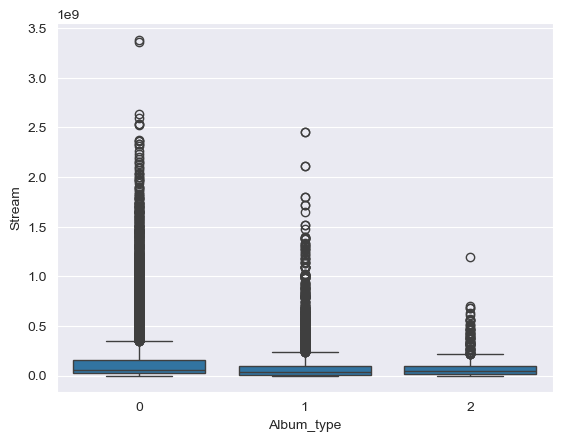

In [9]:
sns.boxplot(data=df, x="Album_type", y="Stream")
plt.show()
plt.close()

As such, using the IQR method to remove outliers for numeric columns and to drop those with more than 20% outliers (too unreliable data):

In [10]:
df_clipped = df.copy()
for column in NUMERIC_COLUMNS:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = df[column][(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)].count()
    print(f"Outlier count: {outlier_count} for column {column}. {outlier_count / len(df) * 100:.2f}% of the dataset")
    if outlier_count > 0:
        if outlier_count > len(df) / 5:
            print(f"Dropping column {column} as outlier count is too high")
            NUMERIC_COLUMNS.remove(column)
            df_clipped.drop(columns=column, inplace=True)
        else:
            df_clipped[column] = df_clipped[column].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
print(f"Numeric columns after removing outliers: {NUMERIC_COLUMNS}")

Outlier count: 248 for column Danceability. 1.27% of the dataset
Outlier count: 369 for column Energy. 1.89% of the dataset
Outlier count: 0 for column Key. 0.00% of the dataset
Outlier count: 1233 for column Loudness. 6.31% of the dataset
Outlier count: 2450 for column Speechiness. 12.53% of the dataset
Outlier count: 0 for column Acousticness. 0.00% of the dataset
Outlier count: 4171 for column Instrumentalness. 21.34% of the dataset
Dropping column Instrumentalness as outlier count is too high
Outlier count: 0 for column Valence. 0.00% of the dataset
Outlier count: 62 for column Tempo. 0.32% of the dataset
Outlier count: 735 for column Duration_ms. 3.76% of the dataset
Outlier count: 2524 for column Views. 12.91% of the dataset
Outlier count: 2485 for column Likes. 12.71% of the dataset
Outlier count: 2537 for column Comments. 12.98% of the dataset
Outlier count: 2174 for column Stream. 11.12% of the dataset
Numeric columns after removing outliers: ['Danceability', 'Energy', 'Key', 

## 1. Boxplots and Violin plots

#### Relationship between song's performance (number of Views (YouTube) and Streams (Spotify)) and the presence of an official video for the song

- **Streams**

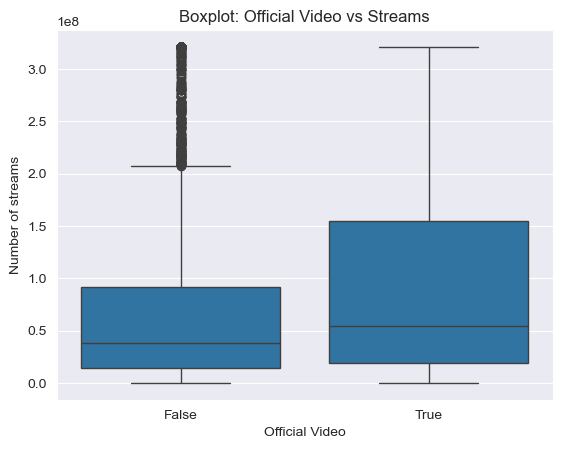

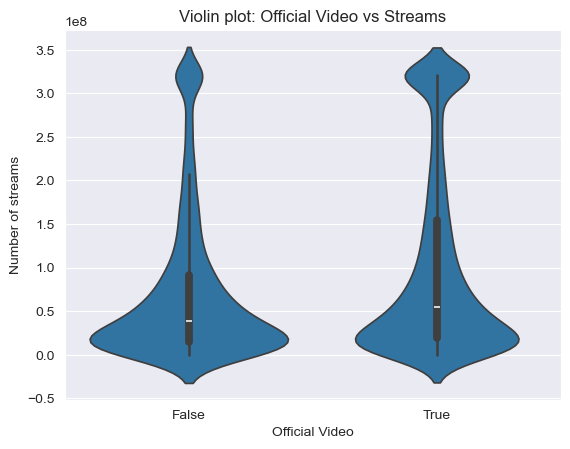

In [11]:
sns.boxplot(x="official_video", y="Stream", data=df_clipped)
plt.title("Boxplot: Official Video vs Streams")
plt.xlabel("Official Video")
plt.ylabel("Number of streams")
plt.show()
plt.close()
sns.violinplot(x="official_video", y="Stream", data=df_clipped)
plt.title("Violin plot: Official Video vs Streams")
plt.xlabel("Official Video")
plt.ylabel("Number of streams")
plt.show()
plt.close()

- **Views**

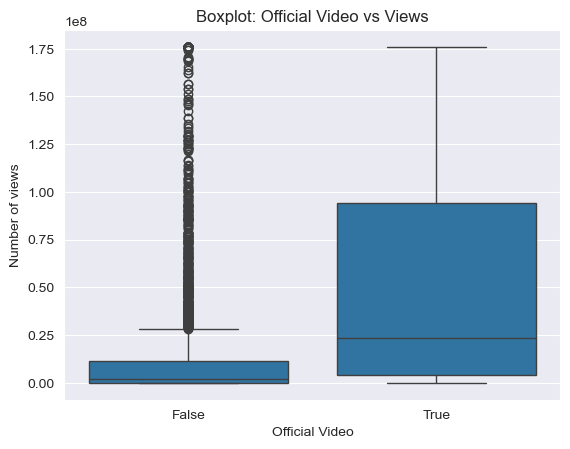

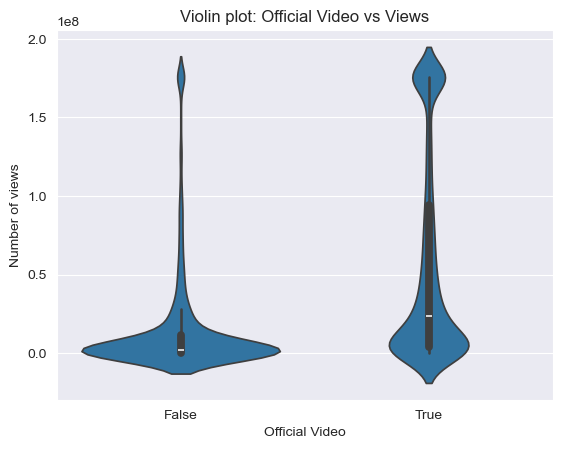

In [12]:
sns.boxplot(x="official_video", y="Views", data=df_clipped)
plt.title("Boxplot: Official Video vs Views")
plt.xlabel("Official Video")
plt.ylabel("Number of views")
plt.show()
plt.close()
sns.violinplot(x="official_video", y="Views", data=df_clipped)
plt.title("Violin plot: Official Video vs Views")
plt.xlabel("Official Video")
plt.ylabel("Number of views")
plt.show()
plt.close()

#### Relationship between the upload format of a song (as a single, album or part of a compilation) and the number of streams on Spotify.
After encoding the album_type category:
- 0 -> Album
- 1 -> Single
- 2 -> Compilation

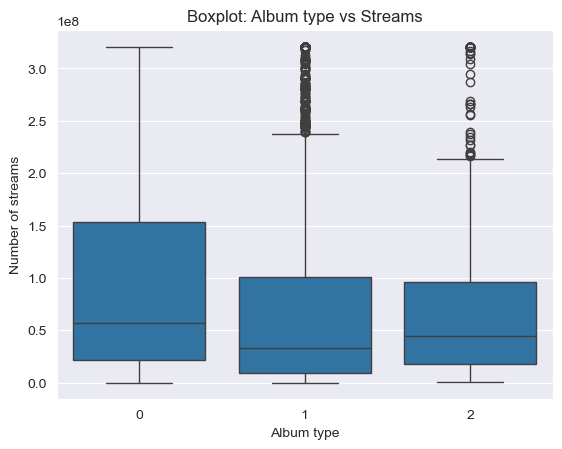

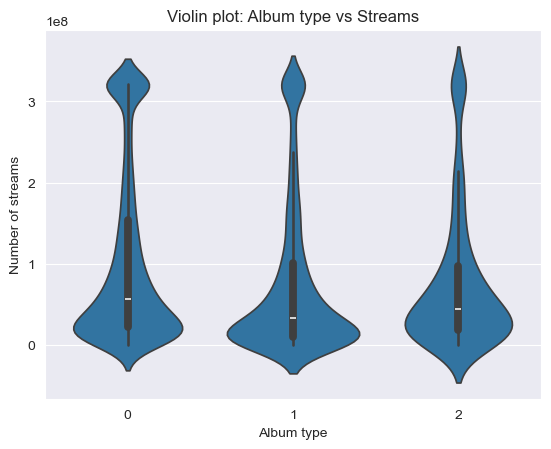

In [13]:
sns.boxplot(x="Album_type", y="Stream", data=df_clipped)
plt.title("Boxplot: Album type vs Streams")
plt.xlabel("Album type")
plt.ylabel("Number of streams")
plt.show()
plt.close()
sns.violinplot(x="Album_type", y="Stream", data=df_clipped)
plt.title("Violin plot: Album type vs Streams")
plt.xlabel("Album type")
plt.ylabel("Number of streams")
plt.show()
plt.close()

##### [Optional] Save boxplots and violinplots to a file

In [14]:
sns.boxplot(x="official_video", y="Views", data=df_clipped)
plt.title("Boxplot: Official Video vs Views")
plt.xlabel("Official Video")
plt.ylabel("Number of views")
save_plot(plt, "boxplot_official_video_vs_views")
plt.close()
sns.violinplot(x="official_video", y="Views", data=df_clipped)
plt.title("Violin plot: Official Video vs Views")
plt.xlabel("Official Video")
plt.ylabel("Number of views")
save_plot(plt, "violinplot_official_video_vs_views")
plt.close()
sns.boxplot(x="official_video", y="Stream", data=df_clipped)
plt.title("Boxplot: Official Video vs Streams")
plt.xlabel("Official Video")
plt.ylabel("Number of streams")
save_plot(plt, "boxplot_official_video_vs_stream")
plt.close()
sns.violinplot(x="official_video", y="Stream", data=df_clipped)
plt.title("Violin plot: Official Video vs Streams")
plt.xlabel("Official Video")
plt.ylabel("Number of streams")
save_plot(plt, "violinplot_official_video_vs_stream")
plt.close()
sns.boxplot(x="Album_type", y="Stream", data=df_clipped)
plt.title("Boxplot: Album Type vs Streams")
plt.xlabel("Album Type")
plt.ylabel("Number of streams")
save_plot(plt, "boxplot_album_type_vs_stream")
plt.close()
sns.violinplot(x="Album_type", y="Stream", data=df_clipped)
plt.title("Violin plot: Album Type vs Streams")
plt.xlabel("Album Type")
plt.ylabel("Number of streams")
save_plot(plt, "violinplot_album_type_vs_stream")
plt.close()

Saved plot boxplot_official_video_vs_views.png
Saved plot violinplot_official_video_vs_views.png
Saved plot boxplot_official_video_vs_stream.png
Saved plot violinplot_official_video_vs_stream.png
Saved plot boxplot_album_type_vs_stream.png
Saved plot violinplot_album_type_vs_stream.png


# 2. Error bar visualization
Due to large spread of data in terms of important numeric values, such as the number of streams or likes, percentile intervals will be used for them instead of standard deviation or standard error to plot the error bars.
Comparison between performance of songs with an official video on Spotify (streams) and YouTube with 75% interval. Nevertheless, even after removing the outliers and reducing the interval to 75%, the spread of data causes error bars to outgrow the chart.

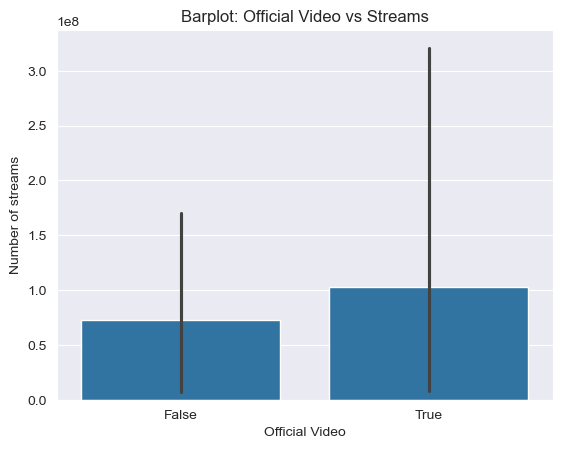

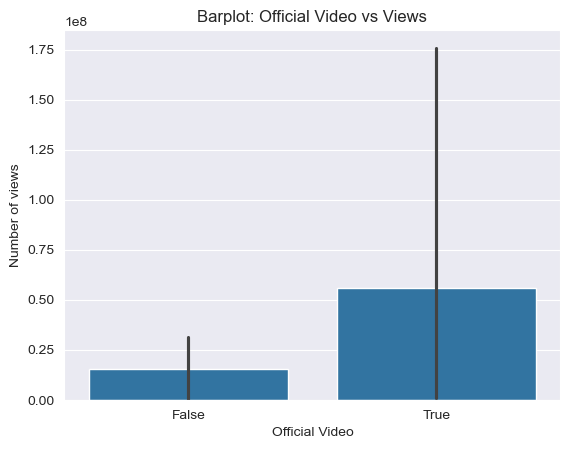

In [15]:
sns.barplot(x="official_video", y="Stream", data=df_clipped, errorbar=("pi", 75))
plt.title("Barplot: Official Video vs Streams")
plt.xlabel("Official Video")
plt.ylabel("Number of streams")
plt.show()
plt.close()
sns.barplot(x="official_video", y="Views", data=df_clipped, errorbar=("pi", 75))
plt.title("Barplot: Official Video vs Views")
plt.xlabel("Official Video")
plt.ylabel("Number of views")
plt.show()
plt.close()

# 3. Histograms for numeric data

#### Distribution of views and streams

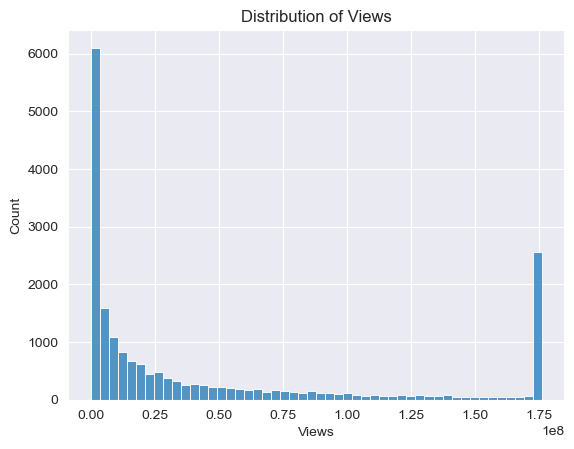

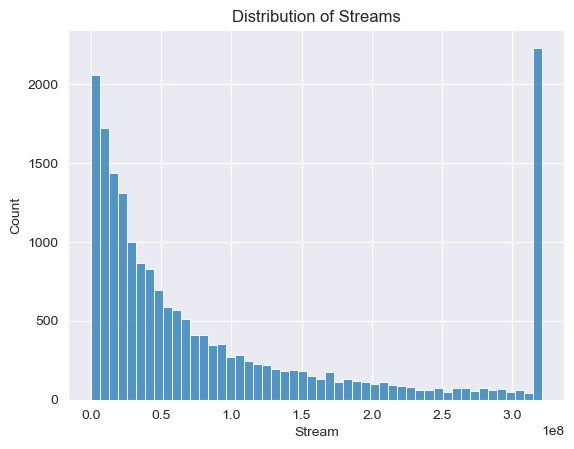

In [16]:
sns.histplot(data=df_clipped, x="Views", bins=50)
plt.title("Distribution of Views")
plt.show()
plt.close()
sns.histplot(data=df_clipped, x="Stream", bins=50)
plt.title("Distribution of Streams")
plt.show()
plt.close()

#### Distribution of song metrics

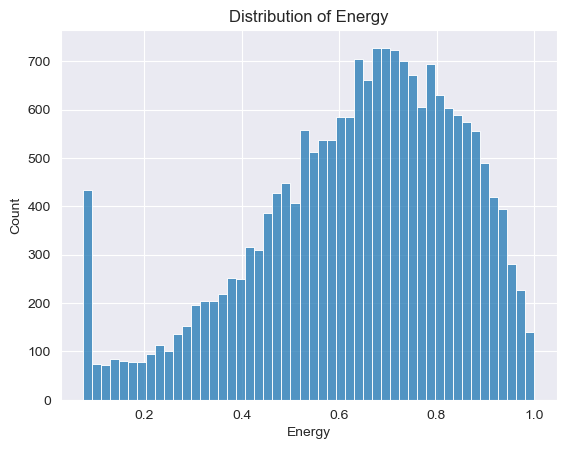

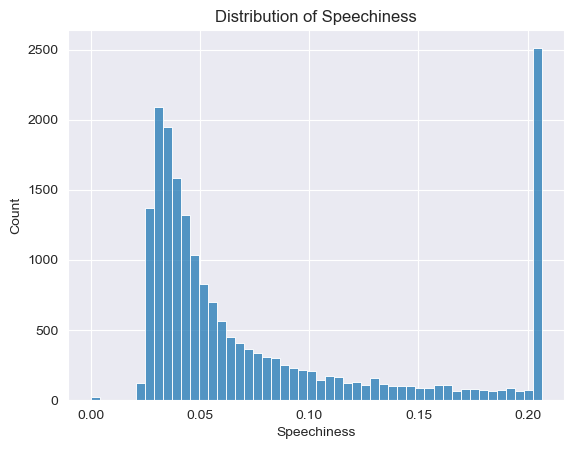

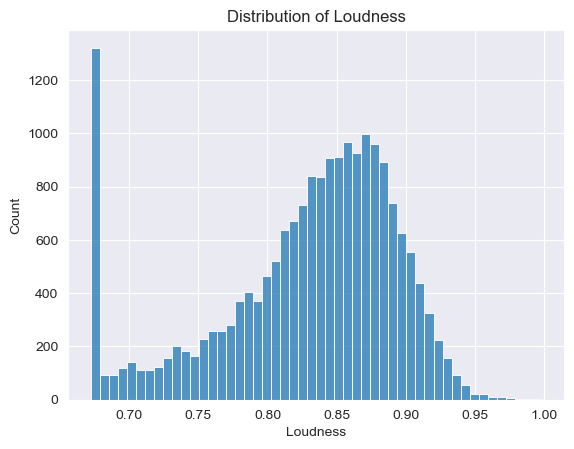

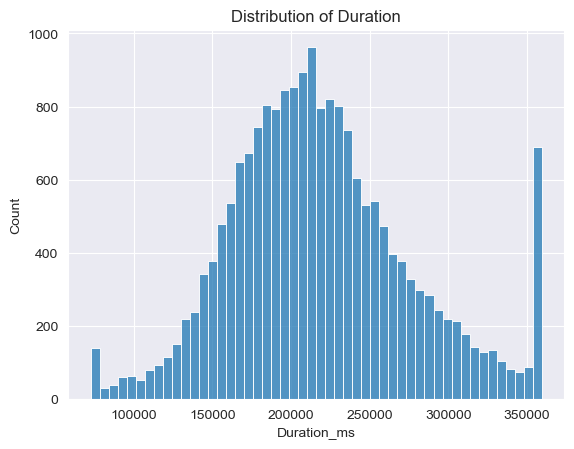

In [17]:
sns.histplot(data=df_clipped, x="Energy", bins=50)
plt.title("Distribution of Energy")
plt.show()
plt.close()
sns.histplot(data=df_clipped, x="Speechiness", bins=50)
plt.title("Distribution of Speechiness")
plt.show()
plt.close()
sns.histplot(data=df_clipped, x="Loudness", bins=50)
plt.title("Distribution of Loudness")
plt.show()
plt.close()
sns.histplot(data=df_clipped, x="Duration_ms", bins=50)
plt.title("Distribution of Duration")
plt.show()
plt.close()

## Adding hue parameter to the histograms
Distribution of streams with hue assigned to Album type category and a normalized version of it.

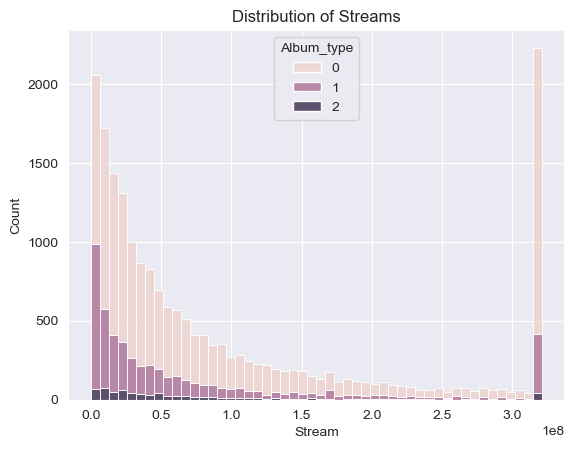

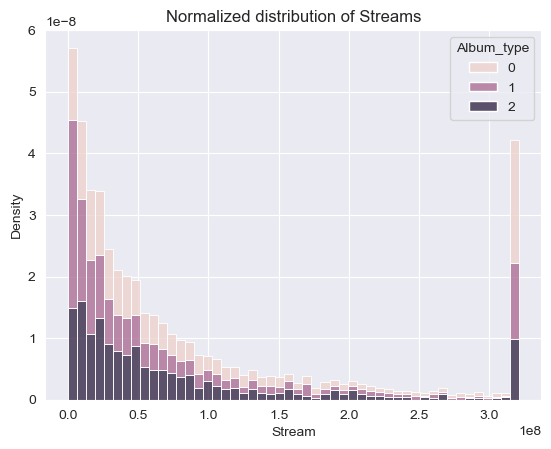

In [18]:
sns.histplot(data=df_clipped, x="Stream", hue="Album_type", bins=50, multiple="stack")
plt.title("Distribution of Streams")
plt.show()
plt.close()
sns.histplot(data=df_clipped, x="Stream", hue="Album_type", bins=50, multiple="stack", stat="density",
             common_norm=False)
plt.title("Normalized distribution of Streams")
plt.show()
plt.close()

It is worth noting that in terms of YouTube performance, the type of album seems to be of no particular relation with the number of views, with each density being roughly equal in any of the buckets.

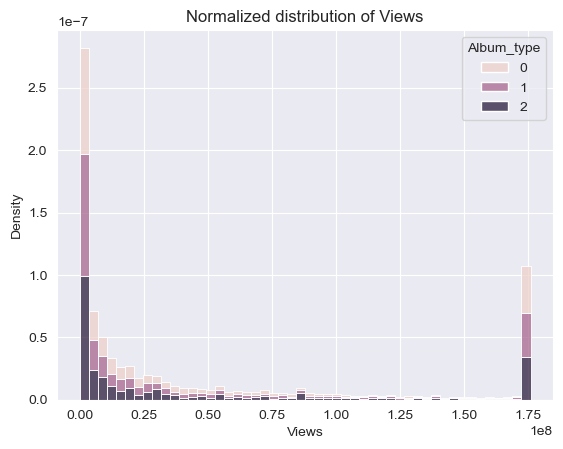

In [19]:
sns.histplot(data=df_clipped, x="Views", hue="Album_type", bins=50, multiple="stack", stat="density", common_norm=False)
plt.title("Normalized distribution of Views")
plt.show()
plt.close()

##### Song key distribution

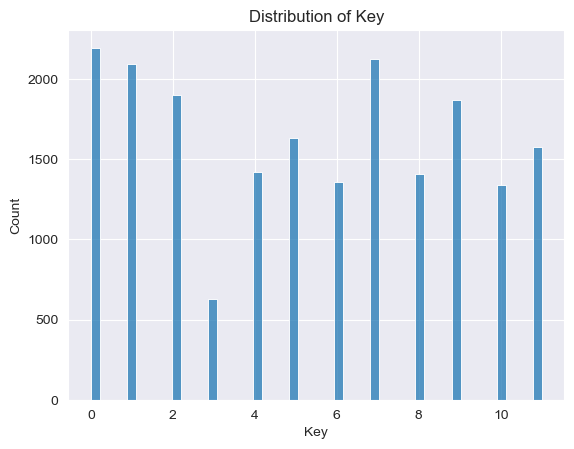

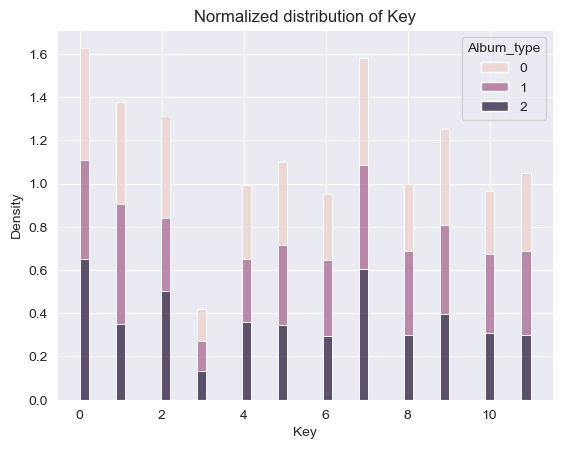

In [20]:
sns.histplot(data=df_clipped, x="Key", bins=50)
plt.title("Distribution of Key")
plt.show()
plt.close()
sns.histplot(data=df_clipped, x="Key", bins=50, hue="Album_type", multiple="stack", stat="density", common_norm=False)
plt.title("Normalized distribution of Key")
plt.show()
plt.close()

##### [Optional] Save distributions to a file

In [21]:
sns.barplot(x="official_video", y="Stream", data=df_clipped, errorbar=("pi", 75))
plt.title("Barplot: Official Video vs Streams")
plt.xlabel("Official Video")
plt.ylabel("Number of streams")
save_plot(plt, "error_barplot_official_video_vs_streams")
plt.close()
sns.barplot(x="official_video", y="Views", data=df_clipped, errorbar=("pi", 75))
plt.title("Barplot: Official Video vs Views")
plt.xlabel("Official Video")
plt.ylabel("Number of views")
save_plot(plt, "error_barplot_official_video_vs_views")
plt.close()
sns.histplot(data=df_clipped, x="Views", bins=50)
plt.title("Distribution of Views")
save_plot(plt, "histplot_views")
plt.close()
sns.histplot(data=df_clipped, x="Stream", bins=50)
plt.title("Distribution of Streams")
save_plot(plt, "histplot_streams")
plt.close()
sns.histplot(data=df_clipped, x="Energy", bins=50)
plt.title("Distribution of Energy")
save_plot(plt, "histplot_energy")
plt.close()
sns.histplot(data=df_clipped, x="Speechiness", bins=50)
plt.title("Distribution of Speechiness")
save_plot(plt, "histplot_speechiness")
plt.close()
sns.histplot(data=df_clipped, x="Loudness", bins=50)
plt.title("Distribution of Loudness")
save_plot(plt, "histplot_loudness")
plt.close()
sns.histplot(data=df_clipped, x="Duration_ms", bins=50)
plt.title("Distribution of Duration")
save_plot(plt, "histplot_duration")
plt.close()
sns.histplot(data=df_clipped, x="Stream", hue="Album_type", bins=50, multiple="stack")
plt.title("Distribution of Streams")
save_plot(plt, "histplot_streams_hue")
plt.close()
sns.histplot(data=df_clipped, x="Stream", hue="Album_type", bins=50, multiple="stack", stat="density",
             common_norm=False)
plt.title("Normalized distribution of Streams")
save_plot(plt, "histplot_streams_hue_normalized")
plt.close()
sns.histplot(data=df_clipped, x="Views", hue="Album_type", bins=50, multiple="stack", stat="density", common_norm=False)
plt.title("Normalized distribution of Views")
save_plot(plt, "histplot_views_hue_normalized")
plt.close()
sns.histplot(data=df_clipped, x="Key", bins=50)
plt.title("Distribution of Key")
save_plot(plt, "histplot_key")
plt.close()
sns.histplot(data=df_clipped, x="Key", bins=50, hue="Album_type", multiple="stack", stat="density", common_norm=False)
plt.title("Normalized distribution of Key")
save_plot(plt, "histplot_key_hue")
plt.close()

Saved plot error_barplot_official_video_vs_streams.png
Saved plot error_barplot_official_video_vs_views.png
Saved plot histplot_views.png
Saved plot histplot_streams.png
Saved plot histplot_energy.png
Saved plot histplot_speechiness.png
Saved plot histplot_loudness.png
Saved plot histplot_duration.png
Saved plot histplot_streams_hue.png
Saved plot histplot_streams_hue_normalized.png
Saved plot histplot_views_hue_normalized.png
Saved plot histplot_key.png
Saved plot histplot_key_hue.png


# 4. Correlation between data

#### Data correlation heatmap

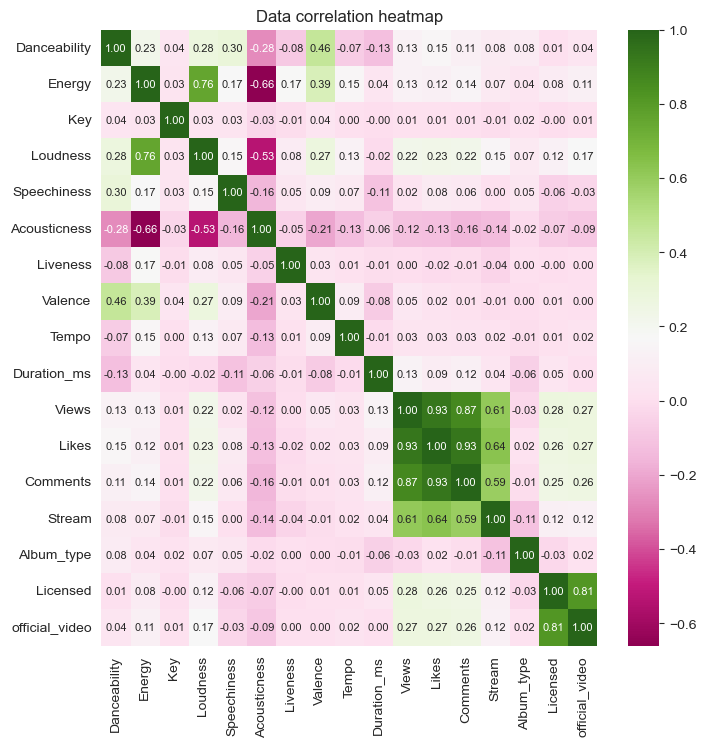

In [22]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_clipped[NUMERIC_COLUMNS + CATEGORICAL_COLUMNS].corr(), annot=True, fmt=".2f", cmap="PiYG",
            annot_kws={"size": 8})
plt.title("Data correlation heatmap")
plt.show()
plt.close()

#### [Optional] Save heatmap to a file


In [24]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_clipped[NUMERIC_COLUMNS + CATEGORICAL_COLUMNS].corr(), annot=True, fmt=".2f", cmap="PiYG",
            annot_kws={"size": 8})
plt.title("Data correlation heatmap")
save_plot(plt, "correlation_heatmap")
plt.close()

Saved plot correlation_heatmap.png


#### Reducing the number of metrics
As seen from the correlation heatmap, likes, views, and comments are seemingly independent variables that share a high correlation of over 0.85. Additionally, they are all connected to video's performance on YouTube platform. As such, we can use PCA method to reduce them into fewer metrics, while trying to account for more than 90% of the variance.

##### Choosing the number of principal components

In [135]:
METRICS_TO_REDUCE = ["Views", "Likes", "Comments"]
for metric in METRICS_TO_REDUCE:
    if metric in NUMERIC_COLUMNS:
        NUMERIC_COLUMNS.remove(metric)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clipped[METRICS_TO_REDUCE])

cov_matrix = np.cov(df_scaled, rowvar=False)
e_values, e_vectors = np.linalg.eig(cov_matrix)

idx = np.argsort(e_values)[::-1]
e_values = e_values[idx]
e_vectors = e_vectors[:, idx]
explained_variance_ratio = e_values / np.sum(e_values)

print("Eigenvalues:\n", e_values)
print("Eigenvectors:\n", e_vectors)
print("Explained Variance Ratios:", explained_variance_ratio)

number_of_components = 0
total_ratio = 0
for e_v,er in zip(e_values,explained_variance_ratio):
    if e_v > 1 and total_ratio < 0.90:
            number_of_components += 1
print(f"Number of components to keep: {number_of_components}")


Eigenvalues:
 [2.82042002 0.13241111 0.04732234]
Eigenvectors:
 [[-0.57251232 -0.71738029  0.39698257]
 [-0.58613096  0.01954194 -0.80998062]
 [-0.57330633  0.69640766  0.4316668 ]]
Explained Variance Ratios: [0.94009191 0.04413478 0.01577331]
Number of components to keep: 1


##### [Optional] Save results of eigenanalysis to a file

In [115]:
df_eigenanalysys = pd.concat([
    pd.DataFrame({
        'Eigenvalue': e_values
    }),
    pd.DataFrame(
        e_vectors,
        columns=['Eigenvector_1', 'Eigenvector_2', 'Eigenvector_3']
    ),
    pd.DataFrame({"Number of Components to Keep": [number_of_components] * len(e_values)}),
    pd.DataFrame({
        'Explained Variance Ratio': explained_variance_ratio
    })
], axis=1)
save_to_csv(df_eigenanalysys, "eigenanalysis")

Saved file eigenanalysis.csv


From the analysis, we can see that the first principal component has a variance ratio of over 94% and is the only one with an eigenvalue greater than 1. As such, we will use only one principal component to replace the three metrics. New metric name: "YT_performance" (songs performance on YouTube platform).

In [136]:
NUMERIC_COLUMNS.append("YT_performance")

pca = PCA(n_components=1)
principal_component = pca.fit_transform(df_scaled)
df_clipped["YT_performance"] = principal_component
df["YT_performance"] = principal_component
df_clipped[NUMERIC_COLUMNS+CATEGORICAL_COLUMNS].head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo,Duration_ms,...,YT_performance,YT_performance,YT_performance,YT_performance,YT_performance,YT_performance,YT_performance,Album_type,Licensed,official_video
0,0.818,0.705,6.0,0.838905,0.1770,0.008360,0.6130,0.772,138.559,222640.0,...,3.612284,3.612284,3.612284,3.612284,3.612284,3.612284,3.612284,0,True,True
1,0.676,0.703,8.0,0.857222,0.0302,0.086900,0.0463,0.852,92.761,200173.0,...,2.173988,2.173988,2.173988,2.173988,2.173988,2.173988,2.173988,0,True,True
2,0.695,0.923,1.0,0.897183,0.0522,0.042500,0.1160,0.551,108.014,215150.0,...,-0.556753,-0.556753,-0.556753,-0.556753,-0.556753,-0.556753,-0.556753,1,True,True
3,0.689,0.739,2.0,0.857328,0.0260,0.000015,0.0640,0.578,120.423,233867.0,...,3.612284,3.612284,3.612284,3.612284,3.612284,3.612284,3.612284,0,True,True
4,0.663,0.694,10.0,0.797609,0.1710,0.025300,0.0698,0.525,167.953,340920.0,...,3.612284,3.612284,3.612284,3.612284,3.612284,3.612284,3.612284,0,True,True


Plotting the correlation heatmap again:

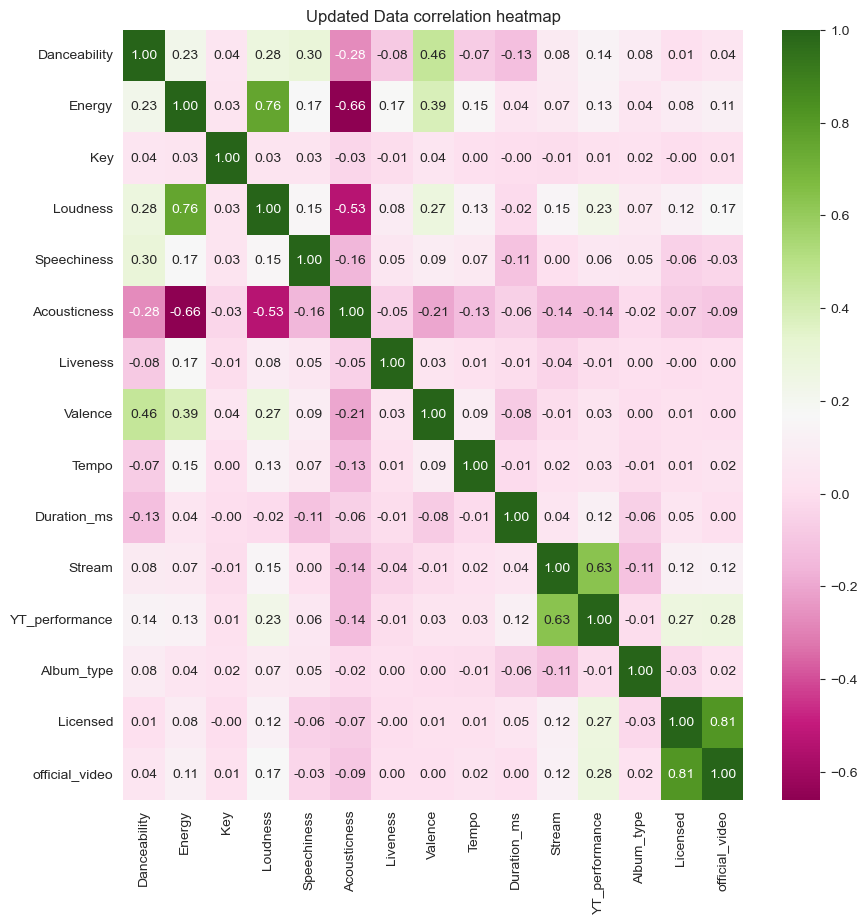

In [117]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_clipped[NUMERIC_COLUMNS + CATEGORICAL_COLUMNS].corr(), annot=True, fmt=".2f", cmap="PiYG",
            annot_kws={"size": 8})
plt.title("Updated Data correlation heatmap")
plt.show()
plt.close()

#### [Optional] Save the updated heatmap to a file

In [118]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_clipped[NUMERIC_COLUMNS + CATEGORICAL_COLUMNS].corr(), annot=True, fmt=".2f", cmap="PiYG",
            annot_kws={"size": 8})
plt.title("Updated Data correlation heatmap")
save_plot(plt, "correlation_heatmap_updated")
plt.close()

Saved plot correlation_heatmap_updated.png


#### Correlation between chosen metrics
Due to a large number of outliers, correlations will be presented using two regression models: OLS (Ordinary Least Squares) and RLM (Robust Linear Model) to reduce the influence of outliers on the results.

##### Correlation between Spotify and YouTube performance

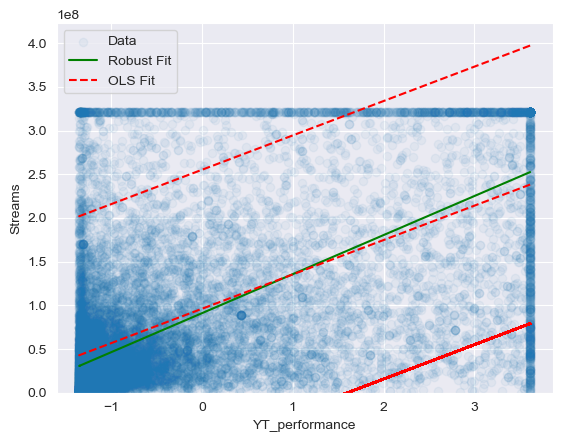

In [122]:
SY_ols = sm.OLS.from_formula("Stream ~ YT_performance", data=df_clipped).fit()
SY_rlm = sm.RLM.from_formula("Stream ~ YT_performance", data=df_clipped).fit()
plt.scatter(df_clipped["YT_performance"], df_clipped["Stream"], label="Data", alpha=0.05)
plt.plot(df_clipped["YT_performance"], SY_rlm.fittedvalues, color="green", label="Robust Fit")
plt.plot(df_clipped["YT_performance"], SY_ols.fittedvalues, color="red", label="OLS Fit", linestyle="--")
pred_ols = SY_ols.get_prediction(df_clipped)
SY_pl = pred_ols.summary_frame()["obs_ci_lower"]
SY_pu = pred_ols.summary_frame()["obs_ci_upper"]
plt.plot(df_clipped["YT_performance"], SY_pu, "r--")
plt.plot(df_clipped["YT_performance"], SY_pl, "r--")
plt.xlabel("YT_performance")
plt.ylabel("Streams")
plt.legend()
plt.ylim(bottom=0)
plt.show()
plt.close()

##### Correlation between Valence and Danceability

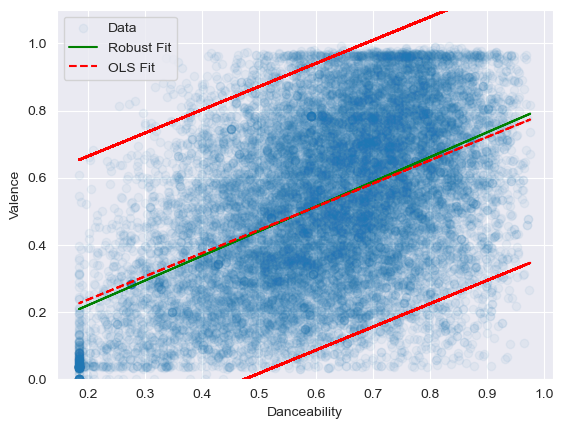

In [64]:
VD_ols = sm.OLS.from_formula("Valence ~ Danceability", data=df_clipped).fit()
VD_rlm = sm.RLM.from_formula("Valence ~ Danceability", data=df_clipped).fit()
plt.scatter(df_clipped["Danceability"], df_clipped["Valence"], label="Data", alpha=0.05)
plt.plot(df_clipped["Danceability"], VD_rlm.fittedvalues, color="green", label="Robust Fit")
plt.plot(df_clipped["Danceability"], VD_ols.fittedvalues, color="red", label="OLS Fit", linestyle="--")
pred_ols = VD_ols.get_prediction(df_clipped)
VD_pl = pred_ols.summary_frame()["obs_ci_lower"]
VD_pu = pred_ols.summary_frame()["obs_ci_upper"]
plt.plot(df_clipped["Danceability"], VD_pu, "r--")
plt.plot(df_clipped["Danceability"], VD_pl, "r--")
plt.xlabel("Danceability")
plt.ylabel("Valence")
plt.ylim(0, 1.1)
plt.legend()
plt.show()
plt.close()

##### Correlation between Energy and Loudness of a song


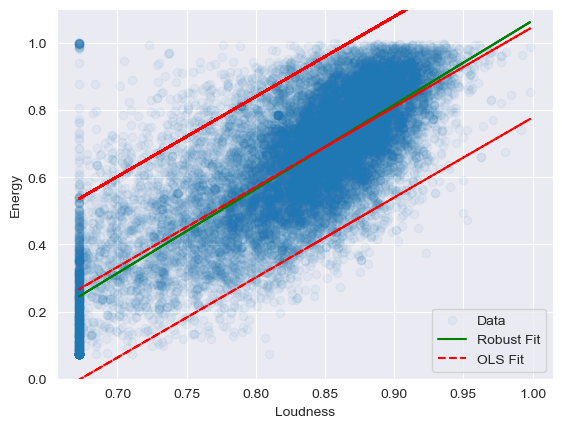

In [66]:
EL_ols = sm.OLS.from_formula("Energy ~ Loudness", data=df_clipped).fit()
EL_rlm = sm.RLM.from_formula("Energy ~ Loudness", data=df_clipped).fit()
plt.scatter(df_clipped["Loudness"], df_clipped["Energy"], label="Data", alpha=0.05)
plt.plot(df_clipped["Loudness"], EL_rlm.fittedvalues, color="green", label="Robust Fit")
plt.plot(df_clipped["Loudness"], EL_ols.fittedvalues, color="red", label="OLS Fit", linestyle="--")
pred_ols = EL_ols.get_prediction(df_clipped)
EL_pl = pred_ols.summary_frame()["obs_ci_lower"]
EL_pu = pred_ols.summary_frame()["obs_ci_upper"]
plt.plot(df_clipped["Loudness"], EL_pu, "r--")
plt.plot(df_clipped["Loudness"], EL_pl, "r--")
plt.xlabel("Loudness")
plt.ylabel("Energy")
plt.ylim(0, 1.1)
plt.legend()
plt.show()
plt.close()

##### [Optional] Save plots to a file


In [31]:
SY_ols = sm.OLS.from_formula("Stream ~ YT_performance", data=df_clipped).fit()
SY_rlm = sm.RLM.from_formula("Stream ~ YT_performance", data=df_clipped).fit()
plt.scatter(df_clipped["YT_performance"], df_clipped["Stream"], label="Data", alpha=0.05)
plt.plot(df_clipped["YT_performance"], SY_rlm.fittedvalues, color="green", label="Robust Fit")
plt.plot(df_clipped["YT_performance"], SY_ols.fittedvalues, color="red", label="OLS Fit", linestyle="--")
pred_ols = SY_ols.get_prediction(df_clipped)
SY_pl = pred_ols.summary_frame()["obs_ci_lower"]
SY_pu = pred_ols.summary_frame()["obs_ci_upper"]
plt.plot(df_clipped["YT_performance"], SY_pu, "r--")
plt.plot(df_clipped["YT_performance"], SY_pl, "r--")
plt.xlabel("YT_performance")
plt.ylabel("Streams")
plt.legend()
plt.ylim(bottom=0)
save_plot(plt, "correlation_Spotify-YT_performance")
plt.close()
VD_ols = sm.OLS.from_formula("Valence ~ Danceability", data=df_clipped).fit()
VD_rlm = sm.RLM.from_formula("Valence ~ Danceability", data=df_clipped).fit()
plt.scatter(df_clipped["Danceability"], df_clipped["Valence"], label="Data", alpha=0.05)
plt.plot(df_clipped["Danceability"], VD_rlm.fittedvalues, color="green", label="Robust Fit")
plt.plot(df_clipped["Danceability"], VD_ols.fittedvalues, color="red", label="OLS Fit", linestyle="--")
pred_ols = VD_ols.get_prediction(df_clipped)
VD_pl = pred_ols.summary_frame()["obs_ci_lower"]
VD_pu = pred_ols.summary_frame()["obs_ci_upper"]
plt.plot(df_clipped["Danceability"], VD_pu, "r--")
plt.plot(df_clipped["Danceability"], VD_pl, "r--")
plt.xlabel("Danceability")
plt.ylabel("Valence")
plt.ylim(0, 1.1)
plt.legend()
save_plot(plt, "correlation_Valence-Danceability")
plt.close()
EL_ols = sm.OLS.from_formula("Energy ~ Loudness", data=df_clipped).fit()
EL_rlm = sm.RLM.from_formula("Energy ~ Loudness", data=df_clipped).fit()
plt.scatter(df_clipped["Loudness"], df_clipped["Energy"], label="Data", alpha=0.05)
plt.plot(df_clipped["Loudness"], EL_rlm.fittedvalues, color="green", label="Robust Fit")
plt.plot(df_clipped["Loudness"], EL_ols.fittedvalues, color="red", label="OLS Fit", linestyle="--")
pred_ols = EL_ols.get_prediction(df_clipped)
EL_pl = pred_ols.summary_frame()["obs_ci_lower"]
EL_pu = pred_ols.summary_frame()["obs_ci_upper"]
plt.plot(df_clipped["Loudness"], EL_pu, "r--")
plt.plot(df_clipped["Loudness"], EL_pl, "r--")
plt.xlabel("Loudness")
plt.ylabel("Energy")
plt.ylim(0, 1.1)
plt.legend()
save_plot(plt, "correlation_Energy-Loudness")
plt.close()

Saved plot correlation_Spotify-YT_performance.png
Saved plot correlation_Valence-Danceability.png
Saved plot correlation_Energy-Loudness.png


### Comparison between song metrics and their performance, based on the results from top artists
Visualizing the correlation between song metric and their performance based only on the top 100 artists according to the cumulative performance metric equal to `0.7 * standarized_streams + 0.3 * standarized_YT_performance`. The new feature takes performance on Spotify with more weight to reduce the impact of visual part of the song.

##### Find the top 100 artists from the unclipped, original dataset
Creating a new metric first:

In [56]:
df_top_artists = df.copy()
scaler = MinMaxScaler(feature_range=(0, 1))
df_top_artists["YT_performance"] = scaler.fit_transform(df_top_artists[["YT_performance"]])
df_top_artists["Stream"] = scaler.fit_transform(df_top_artists[["Stream"]])
df_top_artists["Performance"] = 0.7 * df_top_artists["Stream"] + 0.3 * df_top_artists["YT_performance"]
df_top_artists.drop(columns=["YT_performance", "Stream"], inplace=True)
TOP_ARTISTS_NUMERIC_COLUMNS = NUMERIC_COLUMNS.copy()
TOP_ARTISTS_NUMERIC_COLUMNS.remove("YT_performance")
TOP_ARTISTS_NUMERIC_COLUMNS.remove("Stream")
TOP_ARTISTS_NUMERIC_COLUMNS.append("Performance")
df_top_artists["Performance"].describe()

count    19549.000000
mean         0.109892
std          0.136837
min          0.000002
25%          0.013514
50%          0.046411
75%          0.157099
max          1.000000
Name: Performance, dtype: float64

Finding the top 100. Results from all songs for each artist will be summed together, with negative performance of a song also impacting the outcome:

In [44]:
artist_performance: dict[str, int] = {}
for artist in df_top_artists["Artist"].unique():
    artist_performance[artist] = sum(df_top_artists[df_top_artists["Artist"] == artist]["Performance"])
sorted_performance = sorted(artist_performance.items(), key=lambda x: x[1], reverse=True)
sorted_performance = sorted_performance[:100]
df_artist_performance = pd.DataFrame(sorted_performance, columns=["Artist", "Performance"])
df_artist_performance.head(100)

,Artist,Performance
0,Dua Lipa,5.729692
1,Post Malone,5.679677
2,Ed Sheeran,5.616014
3,Imagine Dragons,5.269304
4,Ariana Grande,5.244238
...,...,...
95,Alan Walker,2.962453
96,Zedd,2.956864
97,EXO,2.948797
98,Martin Garrix,2.945184


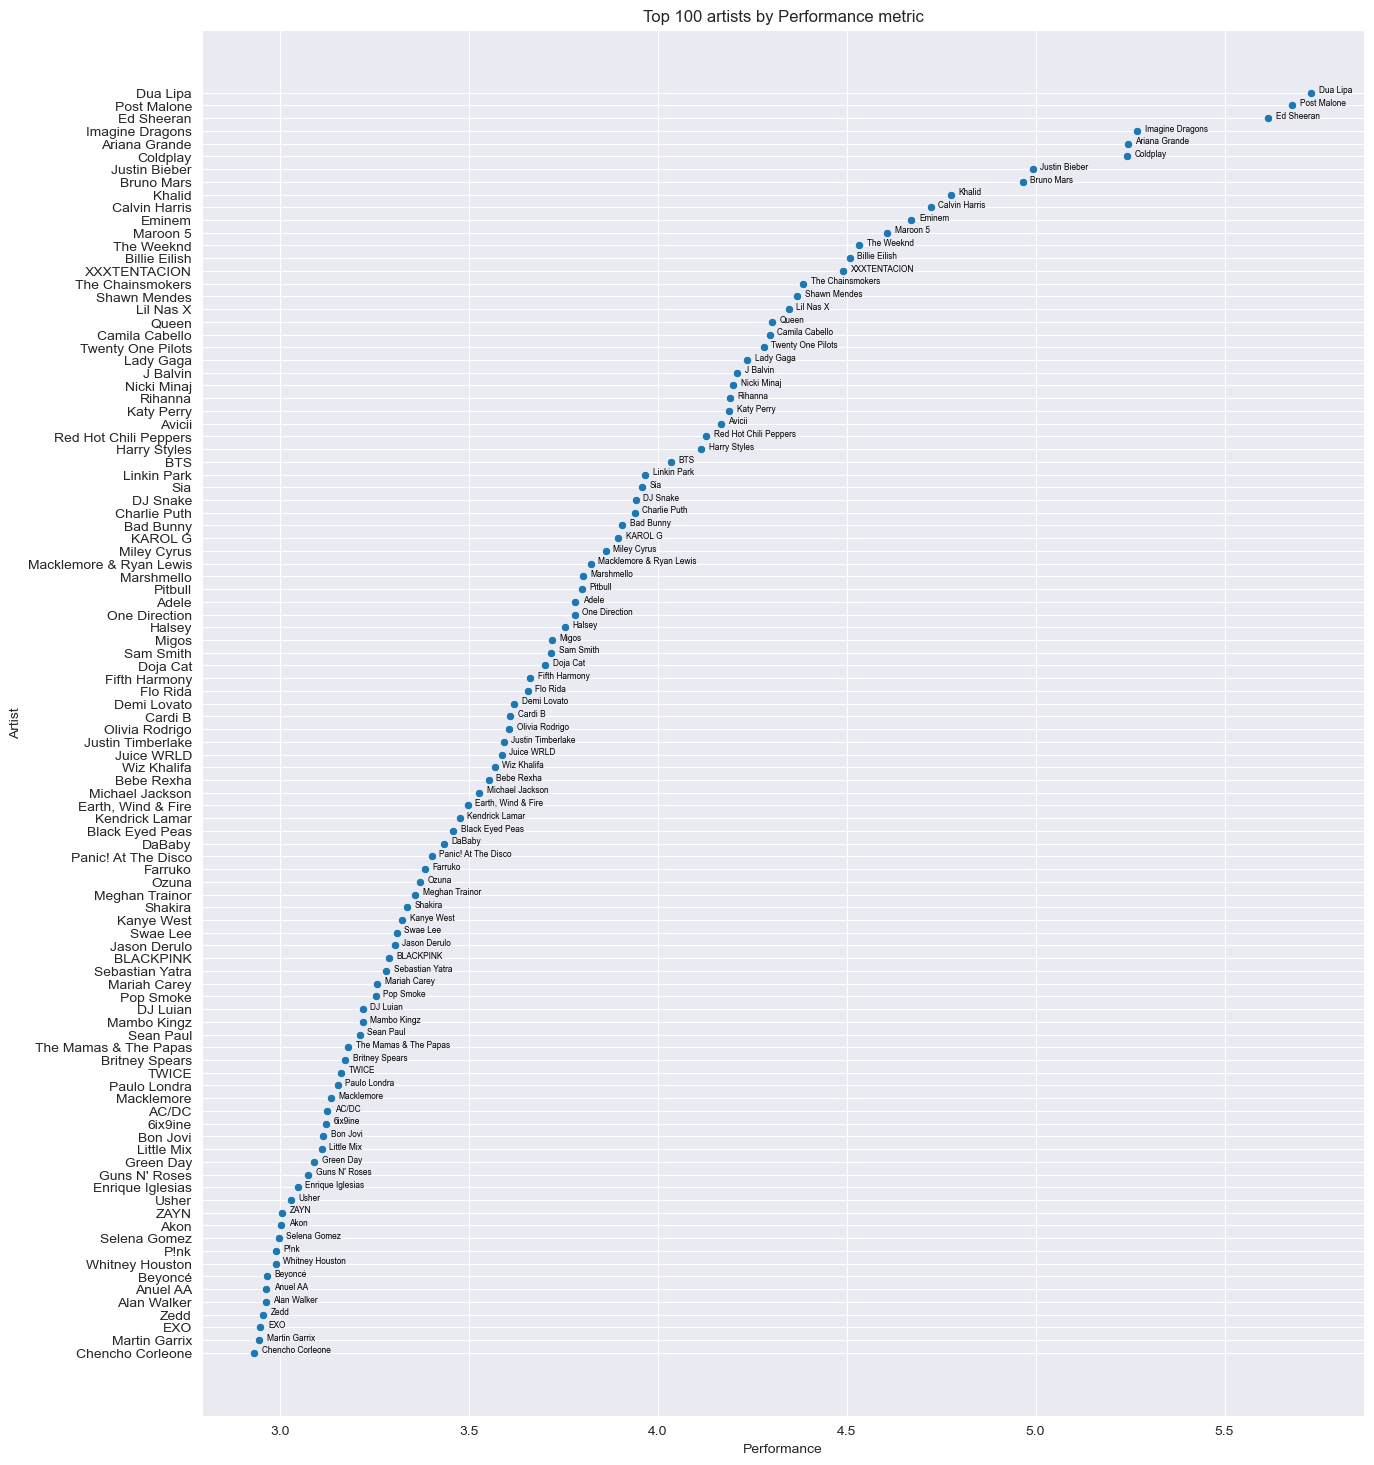

In [50]:
plt.figure(figsize=(15, 18))
sns.scatterplot(x="Performance", y="Artist", data=df_artist_performance)
for i in range(len(df_artist_performance)):
    plt.text(
        x=df_artist_performance["Performance"][i]+ 0.02,
        y=i,
        s=df_artist_performance["Artist"][i],
        fontsize=6,
        color="black"
    )
plt.title("Top 100 artists by Performance metric")
plt.show()
plt.close()

As seen below, there are slight differences when compared to the previous heatmap, most notable lying in the relation of Performance to other numeric metrics

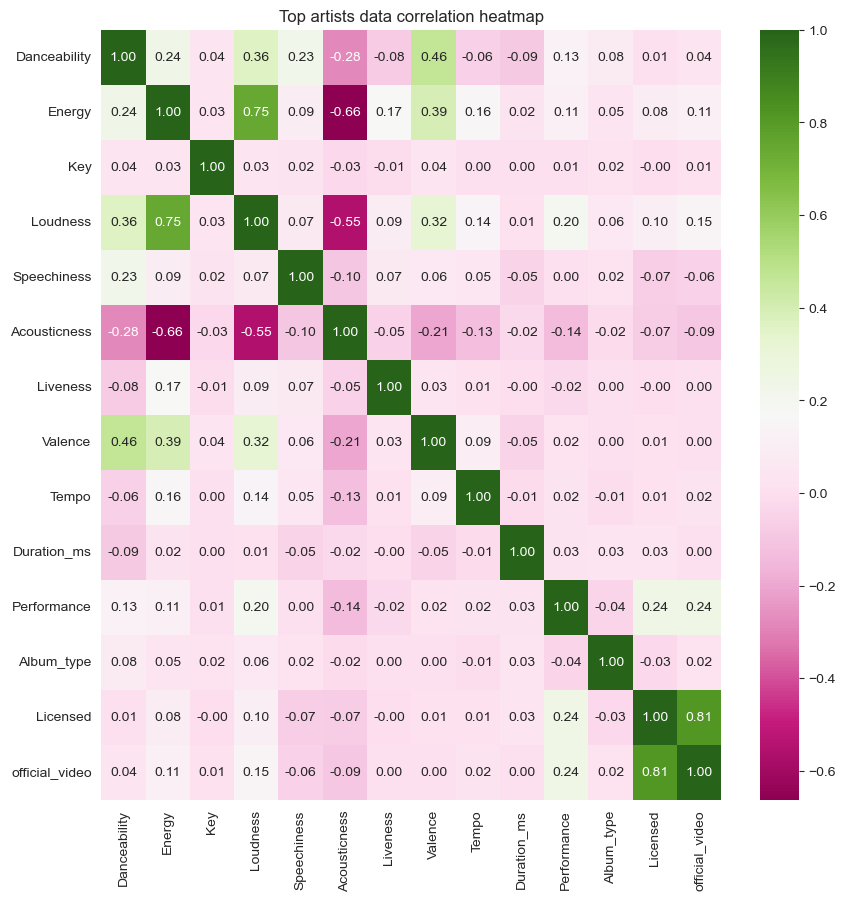

In [48]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_top_artists[TOP_ARTISTS_NUMERIC_COLUMNS + CATEGORICAL_COLUMNS].corr(), annot=True, fmt=".2f", cmap="PiYG",
            annot_kws={"size": 8})
plt.title("Top artists data correlation heatmap")
plt.show()
plt.close()

##### [Optional] Save plots to a file

In [36]:
plt.figure(figsize=(15, 18))
sns.scatterplot(x="Performance", y="Artist", data=df_artist_performance)
for i in range(len(df_artist_performance)):
    plt.text(
        x=df_artist_performance["Performance"][i]+ 0.02,
        y=i,
        s=df_artist_performance["Artist"][i],
        fontsize=6,
        color="black"
    )
plt.title("Top 100 artists by Performance metric")
save_plot(plt, "top_artists_performance")
plt.close()
plt.figure(figsize=(8, 8))
sns.heatmap(df_top_artists[TOP_ARTISTS_NUMERIC_COLUMNS + CATEGORICAL_COLUMNS].corr(), annot=True, fmt=".2f", cmap="PiYG",
            annot_kws={"size": 8})
plt.title("Top artists data correlation heatmap")
save_plot(plt, "top_artists_correlation_heatmap")
plt.close()

Saved plot top_artists_performance.png
Saved plot top_artists_correlation_heatmap.png
